In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from evolutionalg import *

# Cel
Celem tego eksperymentu jest zbadanie wpływu wykorzystania rozkładu Cauchy'ego zamiast rozkładu normalnego do mutacji w klasycznym algorytmie ewolucyjnym.

# Teza
Użycie do mutacji rozkładu Cauchy'ego zamiast rozkładu normalnego pozwala na częstsze występowanie większych "skoków" osobników, co w niektórych sytuacjach pozwala uzyskać lepsze rozwiązanie, w szczególności pozwala na wyjście z lokalnego maksimum i znalezienie globalnego.

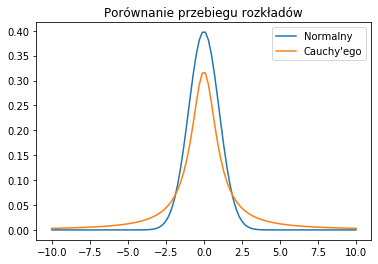

In [2]:
def normal_distribution(x, mean, dev):
    return 1. / (dev * np.sqrt(2*np.pi)) * np.power(np.e, -0.5 * ((x - mean) / dev)**2)

def cauchy_distribution(x, x0, y):
    return 1. / (np.pi * y * (1 + ((x - x0) / y)**2))

x = np.linspace(-10, 10, 100)
plt.plot(x, normal_distribution(x, 0, 1), x, cauchy_distribution(x, 0, 1))
plt.title("Porównanie przebiegu rozkładów")
plt.legend(["Normalny", "Cauchy'ego"])

### Funkcja przystosowania 1.

Oparta na 2 krzywych rozkładu normalnego, występują 2 różne maksima, jedno globalne.

Text(0.5, 1.0, 'Funkcja przystosowania 1.')

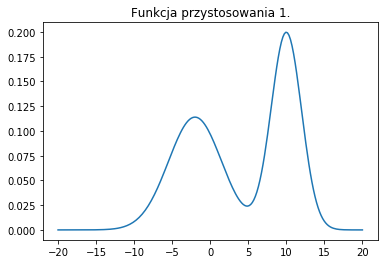

In [3]:
e = EvolutionAlg()

def two_gauss(x):
    return normal_distribution(x, 10, 2) + normal_distribution(x, -2, 3.5)

def fitness_two_gauss(population):
    return [two_gauss(x[0]) for x in population]

x = np.linspace(-20, 20, 200)
plt.plot(x, two_gauss(x))
plt.title("Funkcja przystosowania 1.")

## Parametry

In [4]:
iterations = 40;
children_num = 10;
crossover = 'arithmetic'
crossover_threshold = 0.6

## Populacja 1.:
20 osobników równo rozłożonych na przedziale [-20, 20]

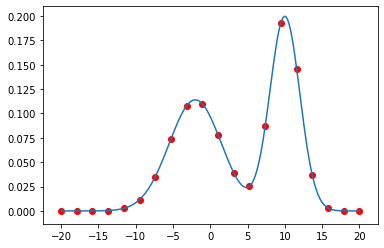

In [5]:
def plot_population(population):
    x = np.linspace(-20, 20, 200)
    plt.plot(x, two_gauss(x))
    plt.scatter(population, two_gauss(population), c='r')
    
def plot_populations(populations):
    n = 3;
    fig, axs = plt.subplots(n, n, figsize=(16,8))
    x = np.linspace(-20, 20, 200)
    for i, p in enumerate(populations):
        axs[int(i/n), i%n].plot(x, two_gauss(x))
        axs[int(i/n), i%n].scatter(p, two_gauss(p), c='r')
        
population_two_gauss = np.linspace(-20, 20, 20).reshape((20, 1))
plot_population(population_two_gauss)

#### (Zestawienia 9 kolejnych wyników działania algorytmu)

### Rozkład normalny (standardowy)

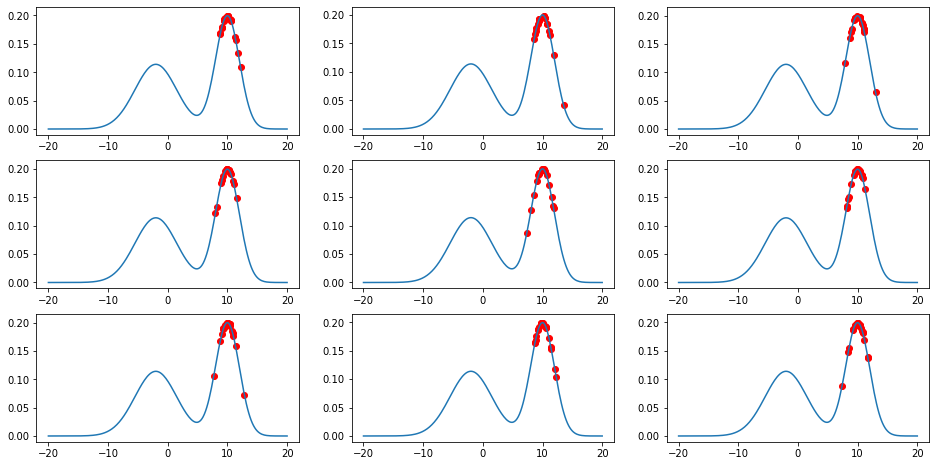

In [6]:
normal_populations = []
for _ in range(9):
    normal_populations.append(e.run(population_two_gauss, fitness_two_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=1, crossover_threshold=crossover_threshold))
plot_populations(normal_populations)

## Rozkład Cauchy'ego (standardowy)

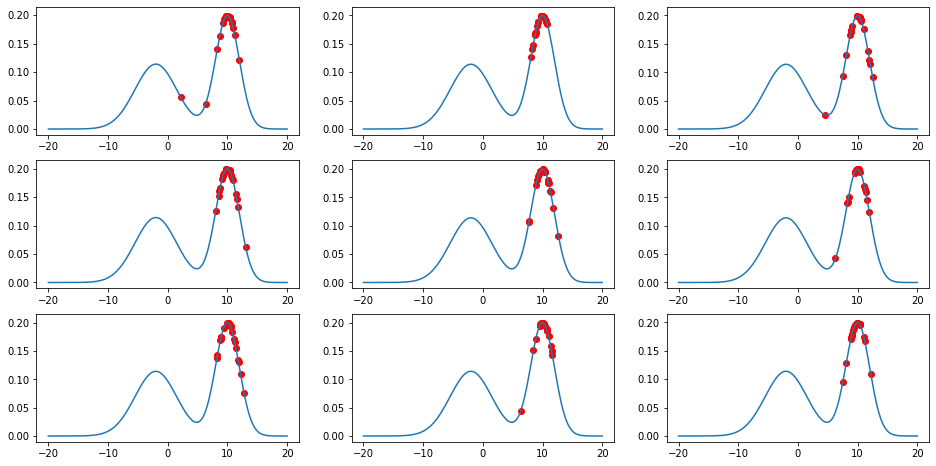

In [7]:
cauchy_populations = []
for _ in range(9):
    cauchy_populations.append(e.run(population_two_gauss, fitness_two_gauss, iterations, children_num, mutation='cauchy', crossover_threshold=crossover_threshold))
plot_populations(cauchy_populations)

## Populacja 2.:
20 osobników równo rozłożonych na przedziale [-20, -5] - zbadanie przejścia przez lokalne maksimum

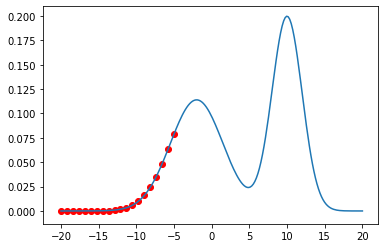

In [8]:
population = np.linspace(-20, -5, 20)
population = population.reshape((population.shape[0], 1))
plot_population(population)

## Rozkład normalny (standardowy)

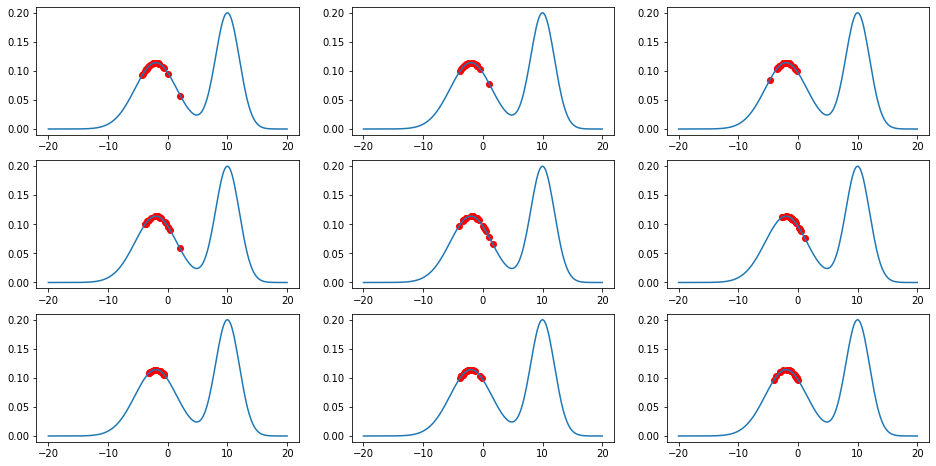

In [9]:
normal_populations = []
for _ in range(9):
    normal_populations.append(e.run(population, fitness_two_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=1, crossover_threshold=crossover_threshold))
plot_populations(normal_populations)

## Rozkład normalny (wyższe odchylenie standardowe = 4)

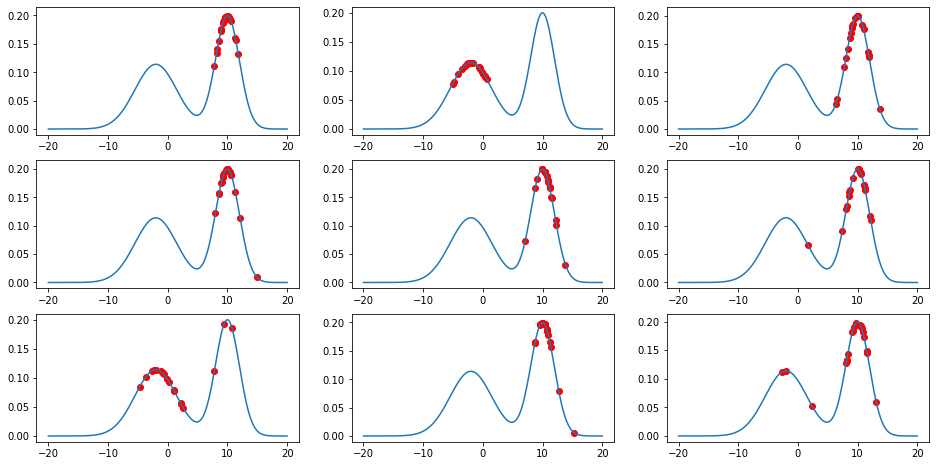

In [10]:
normal_populations2 = []
for _ in range(9):
    normal_populations2.append(e.run(population, fitness_two_gauss, iterations, children_num, mutation='normal',
                                    mutation_std=4, crossover_threshold=crossover_threshold))
plot_populations(normal_populations2)

## Rozkład Cauchy'ego (standardowy)

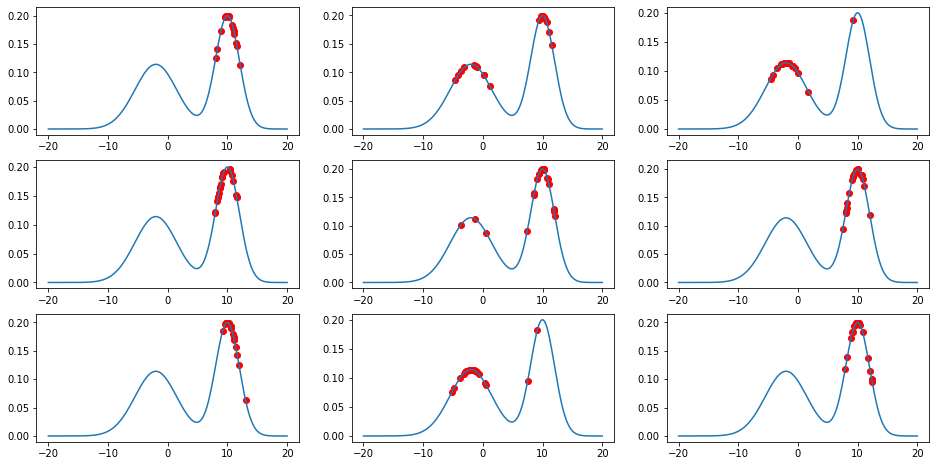

In [11]:
cauchy_populations = []
for _ in range(9):
    cauchy_populations.append(e.run(population, fitness_two_gauss, iterations, children_num, mutation='cauchy', crossover_threshold=crossover_threshold))
plot_populations(cauchy_populations)

## Wnioski bieżące
1. Standardowy algorytm z rozkładem normalnym i domyślnym odchyleniem standardowym (1) osiąga lokalne maksimum. 
* Standardowy algorytm z rozkładem normalnym i dużym odchyleniem standardowym (4) osiąga globalne maksimum, populacja jest jednak stosunkowo rozproszona.
* Algorytm z rozkładem Cauchy'ego (standardowym) w osiąga globalne maksimum, populacja jest skupiona bliżej maksimum niż w przypadku 2)